In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dem_df = pd.read_csv('../data/post_dem_candidates_with_tweet_topics.csv', encoding="ISO-8859-1").dropna(subset=['primary_pctg'])
rep_df = pd.read_csv('../data/post_rep_candidates_with_tweet_topics.csv', encoding="ISO-8859-1").dropna(subset=['primary_pctg'])

sa_all_tweets = pd.read_csv('../data/tweet_data/sa_all_tweets_post.csv', index_col=False)

dem_df['sentiment'] = dem_df['sentiment']
rep_df['sentiment'] = rep_df['sentiment']

print(str(len(dem_df[dem_df['sentiment'].isna() == True])) + " : " + str(len(dem_df)))
print(str(len(rep_df[rep_df['sentiment'].isna() == True])) + " : " + str(len(rep_df)))


149 : 767
266 : 695


In [3]:
dem_df.columns

Index(['candidate', 'twitter_handle', 'twitter_handle2', 'state', 'district',
       'office_type', 'race_type', 'race_primary_election_date',
       'primary_status', 'primary_runoff_status', 'general_status',
       'partisan_lean', 'primary_pctg', 'won_primary', 'race', 'veteran',
       'lgbtq', 'elected_official', 'self_funder', 'stem', 'obama_alum',
       'dem_party_support', 'emily_endorsed', 'gun_sense_candidate',
       'biden_endorsed', 'warren_endorsed', 'sanders_endorsed',
       'our_revolution_endorsed', 'justice_dems_endorsed', 'pccc_endorsed',
       'indivisible_endorsed', 'wfp_endorsed', 'votevets_endorsed',
       'no_labels_support', 'has_twitter', 'num_endorsements',
       'gun_control_tweet_count', 'health_care_tweet_count',
       'abortion_tweet_count', 'immigration_tweet_count',
       'kavanaugh_tweet_count', 'education_tweet_count', 'jobs_tweet_count',
       'tax_tweet_count', 'fake_news_tweet_count', 'environment_tweet_count',
       'sexual_assault_tweet

In [4]:
dem_df[['num_tweets', 'count_negative', 'count_positive', 'sentiment']].head(2)

,num_tweets,count_negative,count_positive,sentiment
0,0,0,0,NaN
1,614,141,334,2.628664


In [5]:
print(len(dem_df[dem_df['sentiment'] > 0]) / len(dem_df))
print(len(dem_df[dem_df['sentiment'] > 0]))

0.8044328552803129
617


/Users/ctan/Projects/POCA/env/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/ctan/Projects/POCA/env/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  1.,   0.,   3.,   9.,  26.,  78., 158., 205., 112.,  26.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

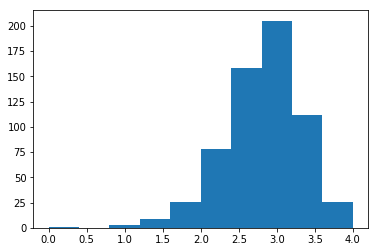

In [6]:
fig, axs = plt.subplots(1)
axs.hist(dem_df['sentiment'])

(array([  3.,   2.,  13.,  29.,  68., 120., 152., 151.,  59.,   9.]),
 array([0.8 , 1.12, 1.44, 1.76, 2.08, 2.4 , 2.72, 3.04, 3.36, 3.68, 4.  ]),
 <a list of 10 Patch objects>)

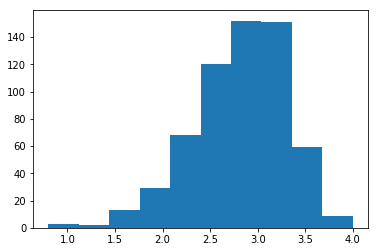

In [7]:
fig, axs = plt.subplots(1)
axs.hist(dem_df[dem_df['num_tweets'] >= 5].sentiment)

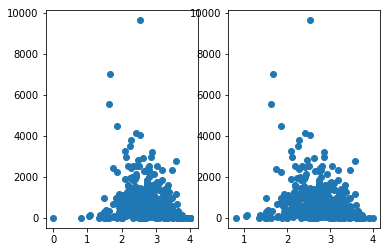

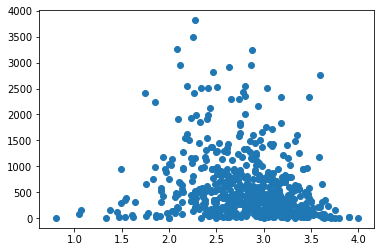

In [8]:
fig, (axs1, axs2) = plt.subplots(1, 2)
t_dem_df = dem_df[dem_df['num_tweets'] >= 0]
x, y = t_dem_df['sentiment'], t_dem_df['num_tweets']
axs1.scatter(x, y)
t_dem_df = dem_df[dem_df['num_tweets'] >= 5]
x, y = t_dem_df['sentiment'], t_dem_df['num_tweets']
axs2.scatter(x, y)

dem_df = dem_df[(dem_df['num_tweets'] >= 5) & (dem_df['num_tweets'] <= 4000)]

fig, axs = plt.subplots(1)
x, y = dem_df['sentiment'], dem_df['num_tweets']
axs.scatter(x, y)

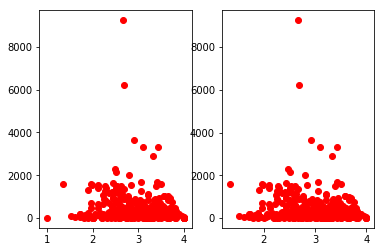

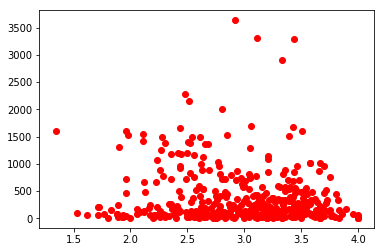

In [9]:
fig, (axs1, axs2) = plt.subplots(1, 2)
t_rep_df = rep_df[rep_df['num_tweets'] >= 0]
x, y = t_rep_df['sentiment'], t_rep_df['num_tweets']
axs1.scatter(x, y, c='red')
t_rep_df = rep_df[rep_df['num_tweets'] >= 5]
x, y = t_rep_df['sentiment'], t_rep_df['num_tweets']
axs2.scatter(x, y, c='red')

rep_df = rep_df[(rep_df['num_tweets'] >= 5) & (rep_df['num_tweets'] <= 5000)]

fig, axs = plt.subplots(1)
x, y = rep_df['sentiment'], rep_df['num_tweets']
axs.scatter(x, y, c='red')

# Number of Tweets to Result

##### Below we can see how the number of tweets corresponds to the result, people who don't tweet as much aren't as likely to win

([array([70., 32., 15.,  6.,  4.,  1.,  0.,  0.,  0.,  3.]),
  array([312.,  56.,  23.,  13.,  14.,   1.,   1.,   0.,   1.,   0.])],
 array([   5. ,  368.2,  731.4, 1094.6, 1457.8, 1821. , 2184.2, 2547.4,
        2910.6, 3273.8, 3637. ]),
 <a list of 2 Lists of Patches objects>)

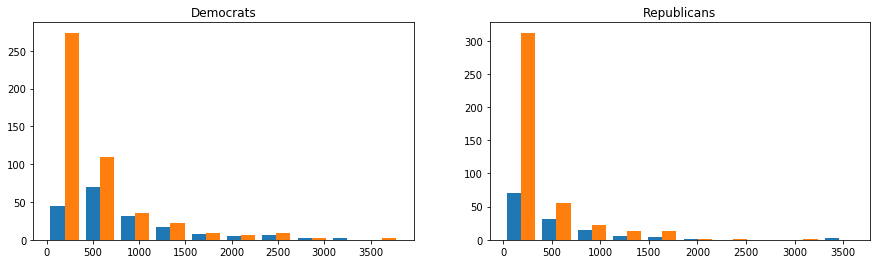

In [10]:
fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(15, 4))
no = dem_df[dem_df['won_primary'] == 'No'].num_tweets
yes = dem_df[dem_df['won_primary'] == 'Yes'].num_tweets
axs1.set_title("Democrats")
axs1.hist([yes, no])

no = rep_df[rep_df['won_primary'] == 'No'].num_tweets
yes = rep_df[rep_df['won_primary'] == 'Yes'].num_tweets
axs2.set_title("Republicans")
axs2.hist([yes, no])

([array([ 0.,  0.,  1.,  2., 10., 37., 63., 52., 20.,  3.]),
  array([ 3.,  2.,  9., 25., 58., 79., 84., 95., 39.,  5.])],
 array([0.8 , 1.12, 1.44, 1.76, 2.08, 2.4 , 2.72, 3.04, 3.36, 3.68, 4.  ]),
 <a list of 2 Lists of Patches objects>)

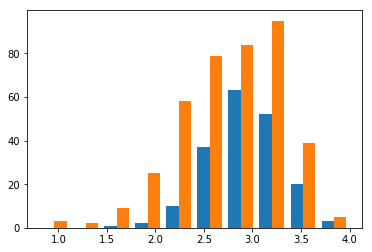

In [11]:
fig, axs = plt.subplots(1)
no = dem_df[dem_df['won_primary'] == 'No'].sentiment
yes = dem_df[dem_df['won_primary'] == 'Yes'].sentiment
axs.hist([yes, no])

([array([69., 37., 16.,  2.,  3.,  1.,  0.,  0.,  1.,  2.]),
  array([120.,  10.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([120.,  10.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])],
 array([   0. ,  261.5,  523. ,  784.5, 1046. , 1307.5, 1569. , 1830.5,
        2092. , 2353.5, 2615. ]),
 <a list of 3 Lists of Patches objects>)

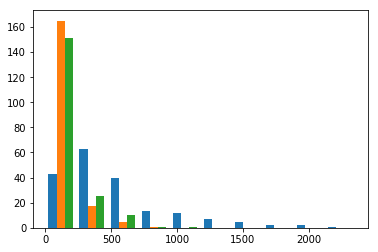

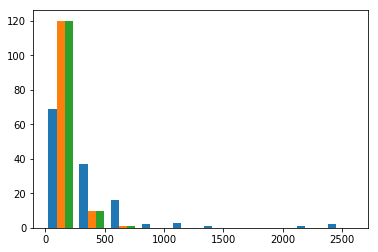

In [19]:
fig, axs = plt.subplots(1)
pos = dem_df[dem_df['won_primary'] == 'Yes'].count_positive
neutral = dem_df[dem_df['won_primary'] == 'Yes'].count_neutral
neg = dem_df[dem_df['won_primary'] == 'Yes'].count_negative

axs.hist([pos, neutral, neg])


fig, axs = plt.subplots(1)
pos = rep_df[rep_df['won_primary'] == 'Yes'].count_positive
neutral = rep_df[rep_df['won_primary'] == 'Yes'].count_neutral
neg = rep_df[rep_df['won_primary'] == 'Yes'].count_negative

axs.hist([pos, neutral, neg])


In [79]:
won_primary_dem_df = dem_df[dem_df['won_primary'] == "Yes"]
won_primary_rep_df = rep_df[rep_df['won_primary'] == "Yes"]
lost_primary_dem_df = dem_df[dem_df['won_primary'] == "No"]
lost_primary_rep_df = rep_df[rep_df['won_primary'] == "No"]

(array([431., 127.,  46.,  30.,  15.,  12.,   6.,   2.,   3.,   1.]),
 array([  0. ,  99.3, 198.6, 297.9, 397.2, 496.5, 595.8, 695.1, 794.4,
        893.7, 993. ]),
 <a list of 10 Patch objects>)

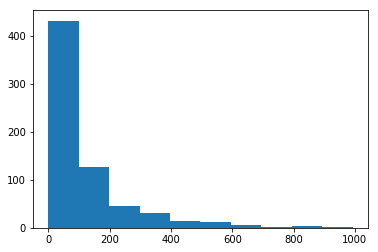

In [80]:
fig, axs = plt.subplots(1)
axs.hist(dem_df[dem_df['count_negative'] < 1000].count_negative)

(array([460., 125.,  49.,  16.,  11.,   4.,   7.,   2.,   0.,   3.]),
 array([  0. ,  99.3, 198.6, 297.9, 397.2, 496.5, 595.8, 695.1, 794.4,
        893.7, 993. ]),
 <a list of 10 Patch objects>)

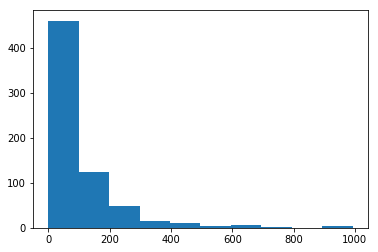

In [81]:
fig, axs = plt.subplots(1)
axs.hist(dem_df[dem_df['count_neutral'] < 1000].count_neutral)

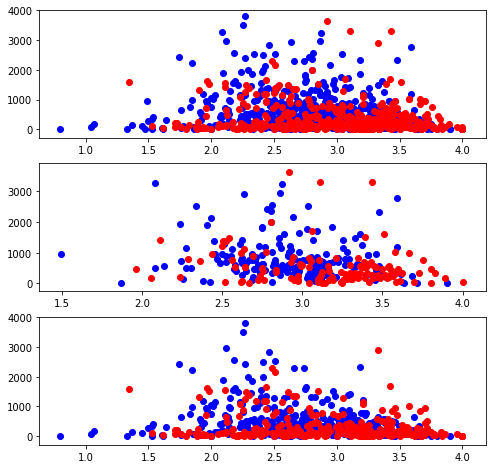

In [85]:
fig, (axs1, axs2, axs3) = plt.subplots(3, 1, figsize=(8, 8))
d1, d2, r1, r2 = dem_df['sentiment'], dem_df['num_tweets'], rep_df['sentiment'], rep_df['num_tweets']
axs1.scatter(d1, d2, c='blue')
axs1.scatter(r1, r2, c='red')

wd1, wd2, wr1, wr2 = won_primary_dem_df['sentiment'], won_primary_dem_df['num_tweets'], won_primary_rep_df['sentiment'], won_primary_rep_df['num_tweets']
axs2.scatter(wd1, wd2, c='blue')
axs2.scatter(wr1, wr2, c='red')

ld1, ld2, lr1, lr2 = lost_primary_dem_df['sentiment'], lost_primary_dem_df['num_tweets'], lost_primary_rep_df['sentiment'], lost_primary_rep_df['num_tweets']
axs3.scatter(ld1, ld2, c='blue')
axs3.scatter(lr1, lr2, c='red')

# Candidate Sentiment vs Number of Endorsements

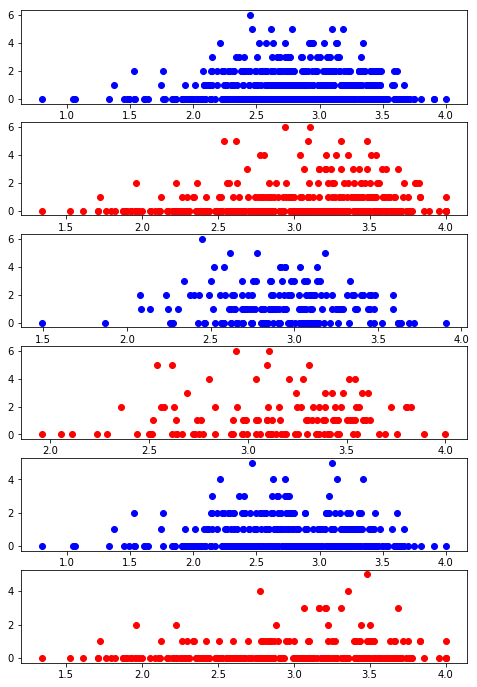

In [95]:
fig, (axs1, axs2, axs3, axs4, axs5, axs6) = plt.subplots(6, 1, figsize=(8, 12))
d1, d2, r1, r2 = dem_df['sentiment'], dem_df['num_endorsements'], rep_df['sentiment'], rep_df['num_endorsements']
axs1.scatter(d1, d2, c='blue')
axs2.scatter(r1, r2, c='red')

wd1, wd2, wr1, wr2 = won_primary_dem_df['sentiment'], won_primary_dem_df['num_endorsements'], won_primary_rep_df['sentiment'], won_primary_rep_df['num_endorsements']
axs3.scatter(wd1, wd2, c='blue')
axs4.scatter(wr1, wr2, c='red')

ld1, ld2, lr1, lr2 = lost_primary_dem_df['sentiment'], lost_primary_dem_df['num_endorsements'], lost_primary_rep_df['sentiment'], lost_primary_rep_df['num_endorsements']
axs5.scatter(ld1, ld2, c='blue')
axs6.scatter(lr1, lr2, c='red')

# Candidate Sentiment vs Number of Gun Control Tweets

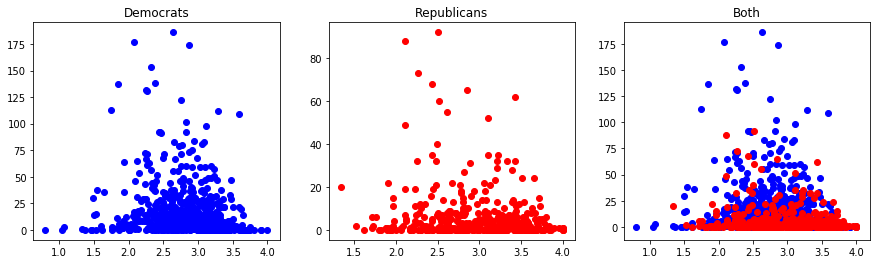

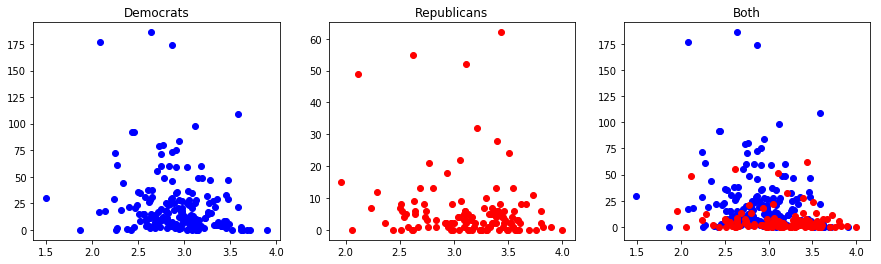

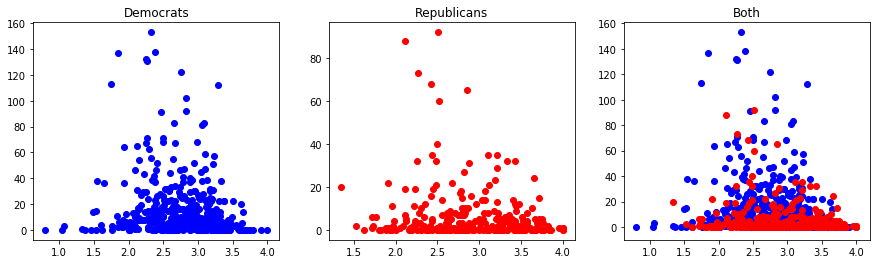

In [77]:
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = dem_df['sentiment'], dem_df['gun_control_tweet_count'], rep_df['sentiment'], rep_df['gun_control_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = won_primary_dem_df['sentiment'], won_primary_dem_df['gun_control_tweet_count'], won_primary_rep_df['sentiment'], won_primary_rep_df['gun_control_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = lost_primary_dem_df['sentiment'], lost_primary_dem_df['gun_control_tweet_count'], lost_primary_rep_df['sentiment'], lost_primary_rep_df['gun_control_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

# Candidate Sentiment vs Number of Health Care Tweets

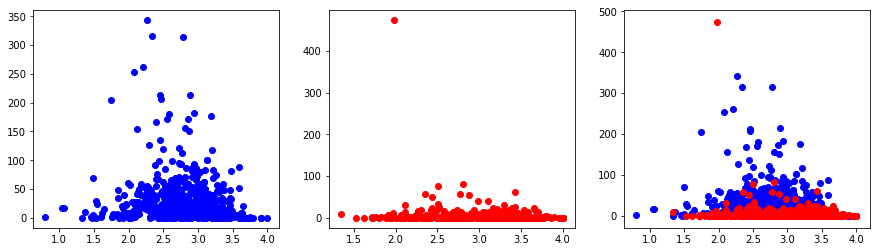

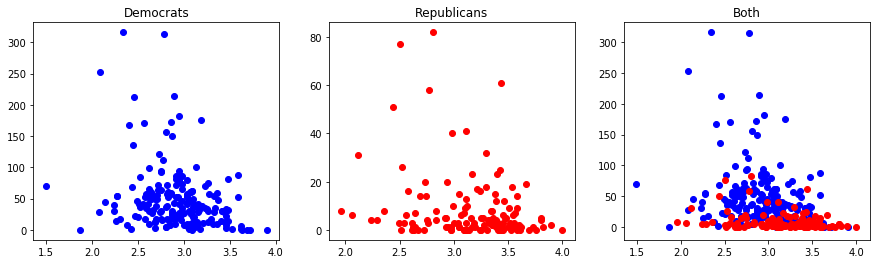

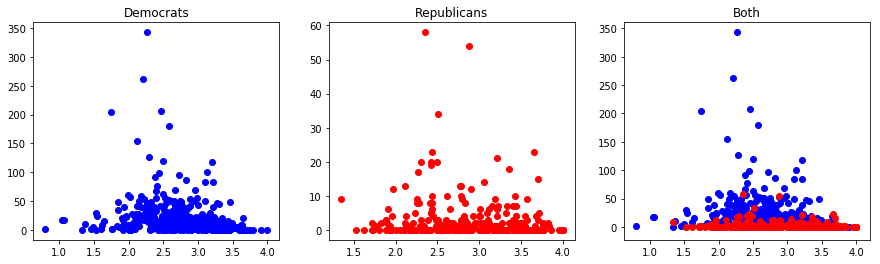

In [98]:
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = dem_df['sentiment'], dem_df['health_care_tweet_count'], rep_df['sentiment'], rep_df['health_care_tweet_count']
axs1.scatter(d1, d2, c='blue')
axs2.scatter(r1, r2, c='red')
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
wd = won_primary_dem_df[won_primary_dem_df['health_care_tweet_count'] < 400]
wr = won_primary_rep_df[won_primary_rep_df['health_care_tweet_count'] < 400]
d1, d2, r1, r2 = wd['sentiment'], wd['health_care_tweet_count'], wr['sentiment'], wr['health_care_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
ld = lost_primary_dem_df[lost_primary_dem_df['health_care_tweet_count'] < 400]
lr = lost_primary_rep_df[lost_primary_rep_df['health_care_tweet_count'] < 400]
d1, d2, r1, r2 = ld['sentiment'], ld['health_care_tweet_count'], lr['sentiment'], lr['health_care_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

# Candidate Sentiment vs Number of Abortion Tweets

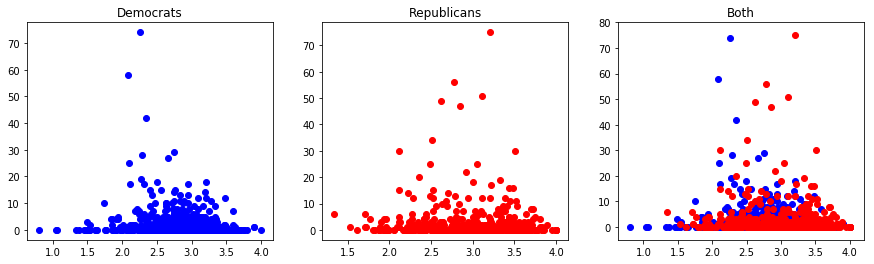

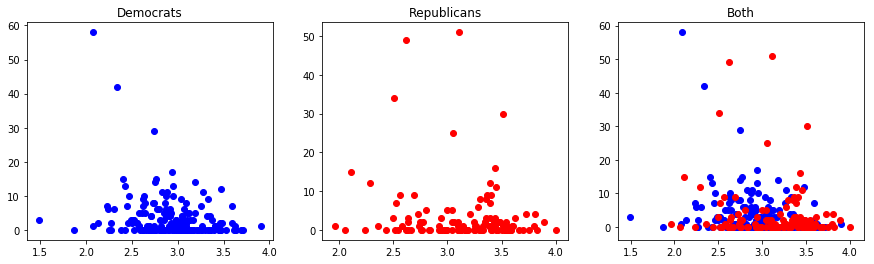

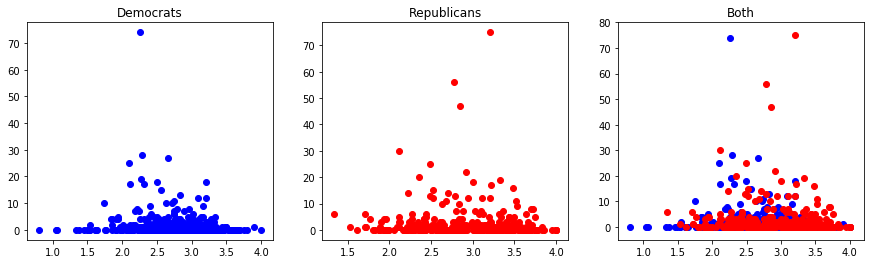

In [99]:
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = dem_df['sentiment'], dem_df['abortion_tweet_count'], rep_df['sentiment'], rep_df['abortion_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = won_primary_dem_df['sentiment'], won_primary_dem_df['abortion_tweet_count'], won_primary_rep_df['sentiment'], won_primary_rep_df['abortion_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = lost_primary_dem_df['sentiment'], lost_primary_dem_df['abortion_tweet_count'], lost_primary_rep_df['sentiment'], lost_primary_rep_df['abortion_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

# Candidate Sentiment vs Number of Immigration Tweets

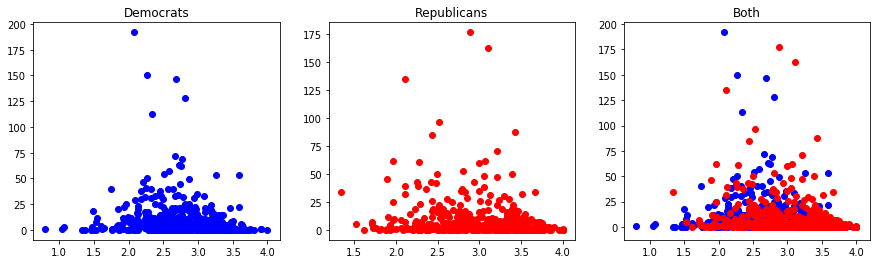

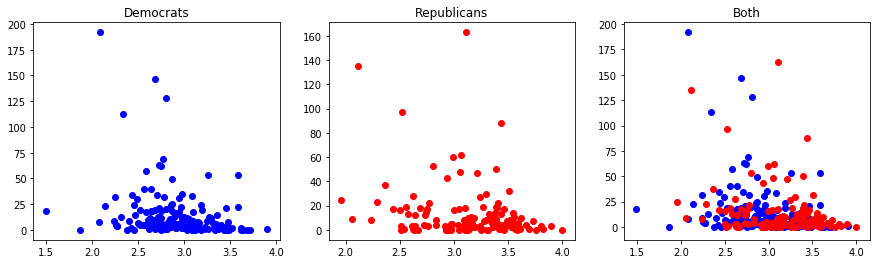

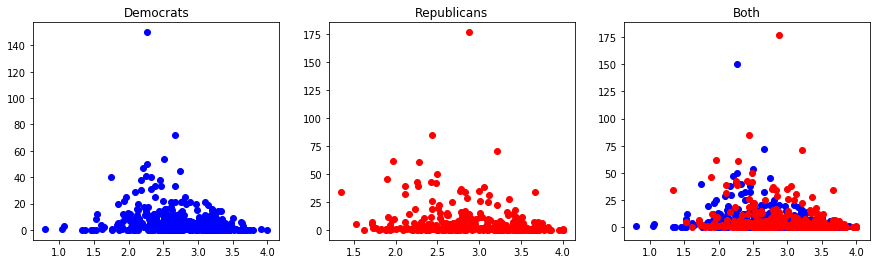

In [100]:
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = dem_df['sentiment'], dem_df['immigration_tweet_count'], rep_df['sentiment'], rep_df['immigration_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = won_primary_dem_df['sentiment'], won_primary_dem_df['immigration_tweet_count'], won_primary_rep_df['sentiment'], won_primary_rep_df['immigration_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = lost_primary_dem_df['sentiment'], lost_primary_dem_df['immigration_tweet_count'], lost_primary_rep_df['sentiment'], lost_primary_rep_df['immigration_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

# Candidate Sentiment vs Number of Kavanaugh Tweets

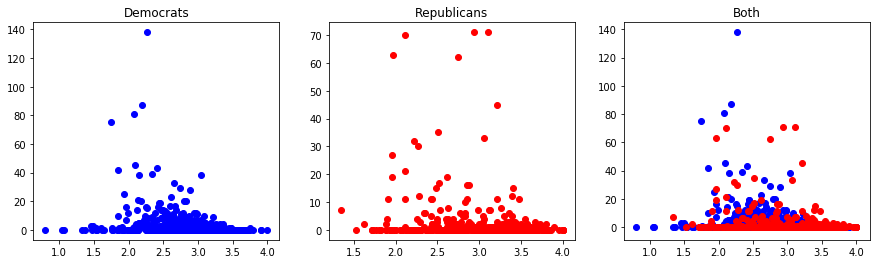

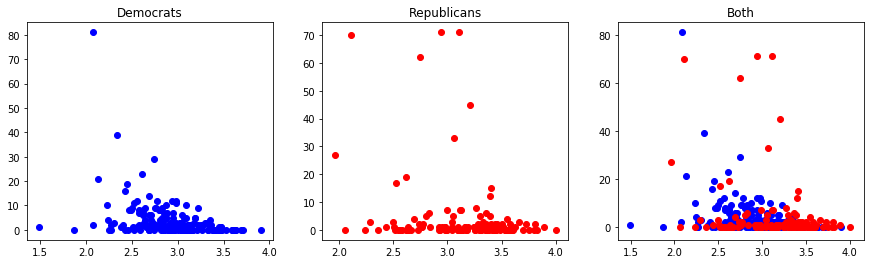

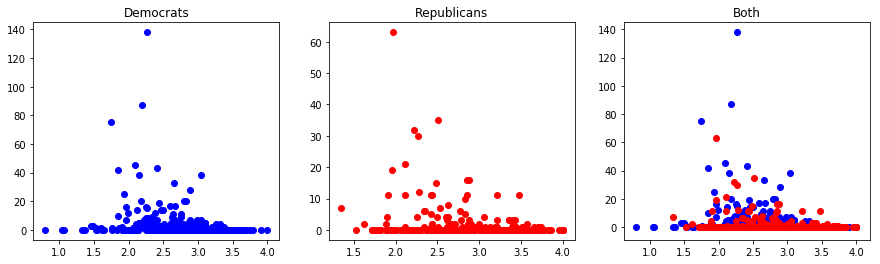

In [101]:
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = dem_df['sentiment'], dem_df['kavanaugh_tweet_count'], rep_df['sentiment'], rep_df['kavanaugh_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = won_primary_dem_df['sentiment'], won_primary_dem_df['kavanaugh_tweet_count'], won_primary_rep_df['sentiment'], won_primary_rep_df['kavanaugh_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = lost_primary_dem_df['sentiment'], lost_primary_dem_df['kavanaugh_tweet_count'], lost_primary_rep_df['sentiment'], lost_primary_rep_df['kavanaugh_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

# Candidate Sentiment vs Number of Education Tweets

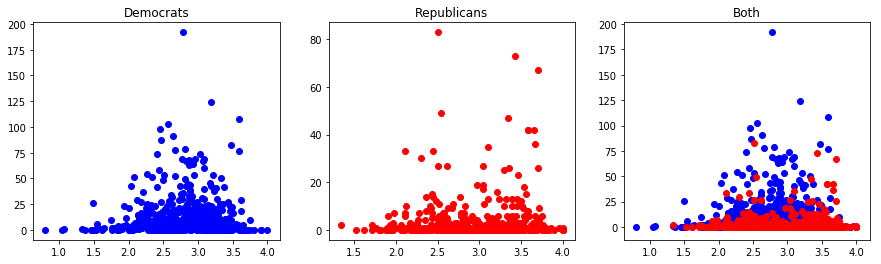

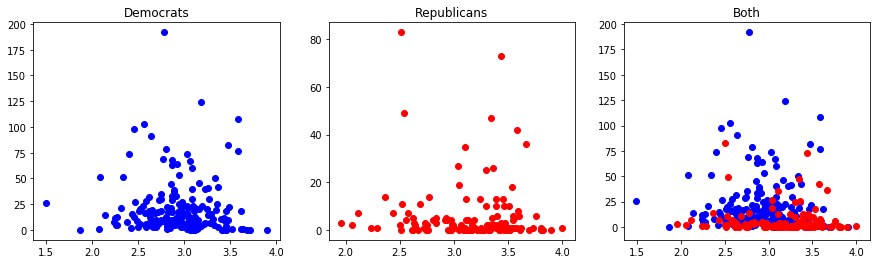

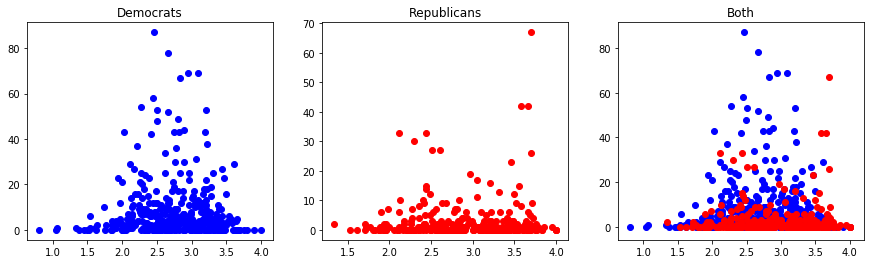

In [102]:
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = dem_df['sentiment'], dem_df['education_tweet_count'], rep_df['sentiment'], rep_df['education_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = won_primary_dem_df['sentiment'], won_primary_dem_df['education_tweet_count'], won_primary_rep_df['sentiment'], won_primary_rep_df['education_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = lost_primary_dem_df['sentiment'], lost_primary_dem_df['education_tweet_count'], lost_primary_rep_df['sentiment'], lost_primary_rep_df['education_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

# Candidate Sentiment vs Number of Jobs Tweets

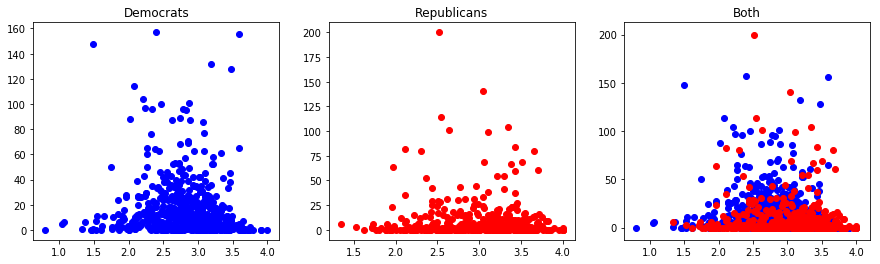

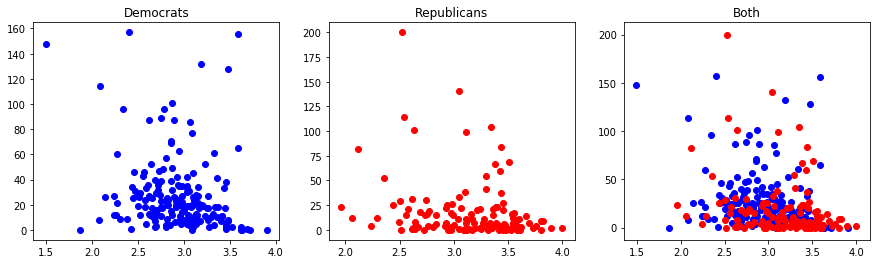

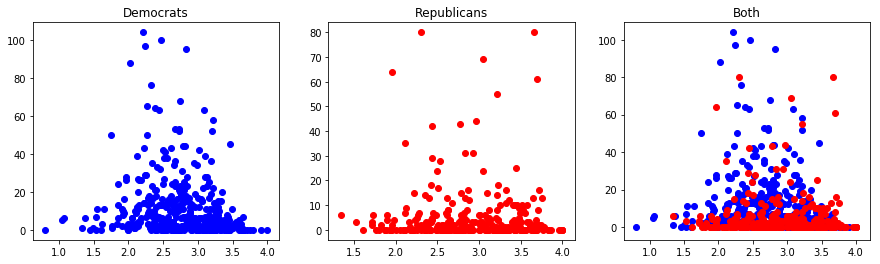

In [103]:
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = dem_df['sentiment'], dem_df['jobs_tweet_count'], rep_df['sentiment'], rep_df['jobs_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = won_primary_dem_df['sentiment'], won_primary_dem_df['jobs_tweet_count'], won_primary_rep_df['sentiment'], won_primary_rep_df['jobs_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = lost_primary_dem_df['sentiment'], lost_primary_dem_df['jobs_tweet_count'], lost_primary_rep_df['sentiment'], lost_primary_rep_df['jobs_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

# Candidate Sentiment vs Number of Tax Tweets

#### WIP

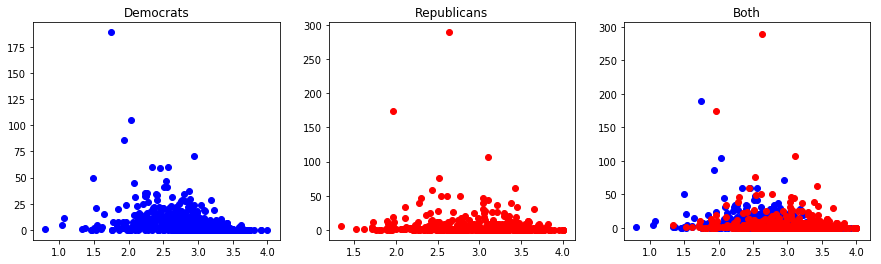

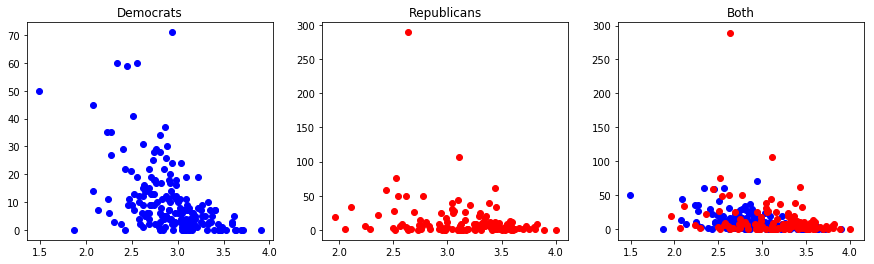

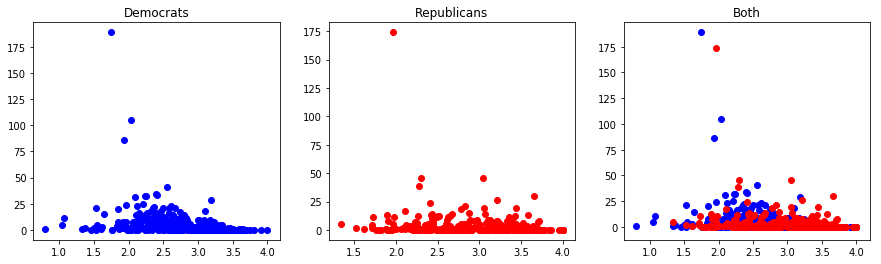

In [104]:
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = dem_df['sentiment'], dem_df['tax_tweet_count'], rep_df['sentiment'], rep_df['tax_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = won_primary_dem_df['sentiment'], won_primary_dem_df['tax_tweet_count'], won_primary_rep_df['sentiment'], won_primary_rep_df['tax_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = lost_primary_dem_df['sentiment'], lost_primary_dem_df['tax_tweet_count'], lost_primary_rep_df['sentiment'], lost_primary_rep_df['tax_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

# Candidate Sentiment vs Number of Fake News Tweets

#### WIP

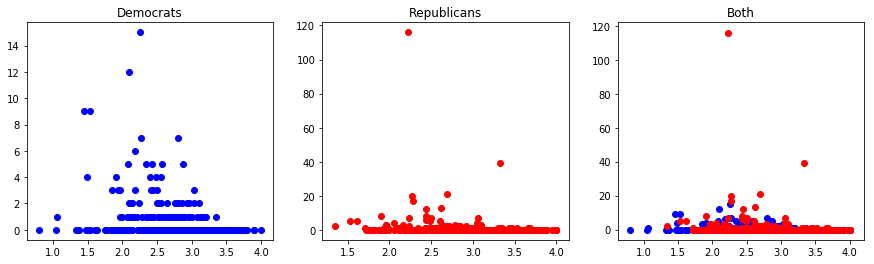

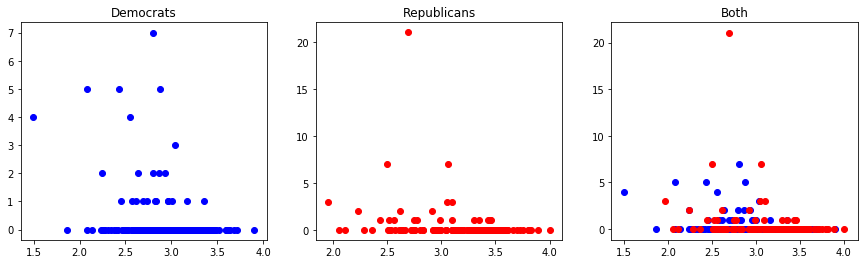

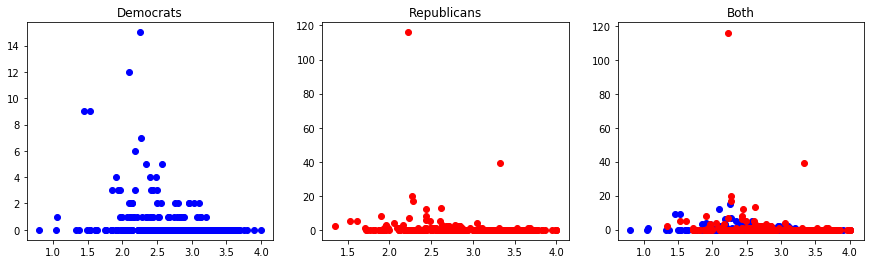

In [105]:
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = dem_df['sentiment'], dem_df['fake_news_tweet_count'], rep_df['sentiment'], rep_df['fake_news_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = won_primary_dem_df['sentiment'], won_primary_dem_df['fake_news_tweet_count'], won_primary_rep_df['sentiment'], won_primary_rep_df['fake_news_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = lost_primary_dem_df['sentiment'], lost_primary_dem_df['fake_news_tweet_count'], lost_primary_rep_df['sentiment'], lost_primary_rep_df['fake_news_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

# Candidate Sentiment vs Number of Environment Tweets

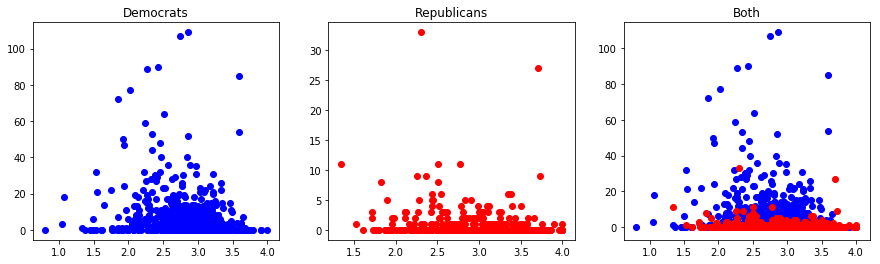

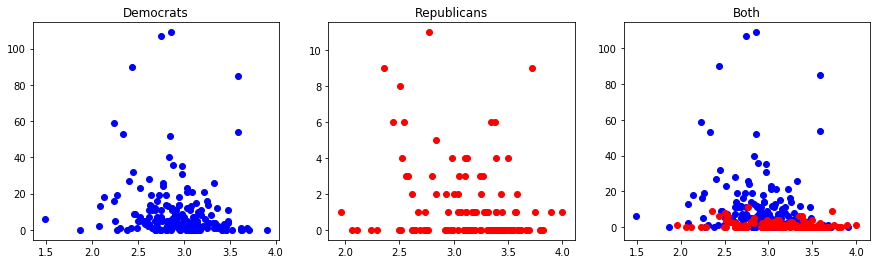

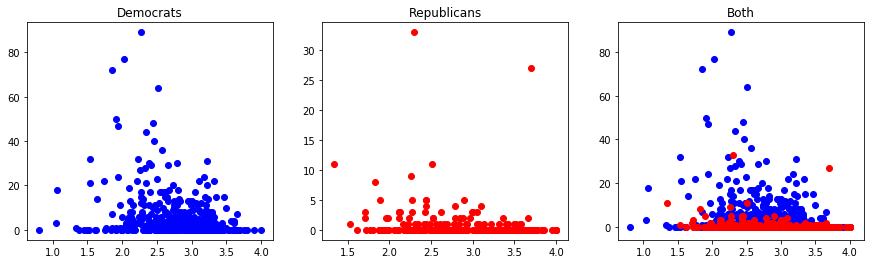

In [106]:
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = dem_df['sentiment'], dem_df['environment_tweet_count'], rep_df['sentiment'], rep_df['environment_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = won_primary_dem_df['sentiment'], won_primary_dem_df['environment_tweet_count'], won_primary_rep_df['sentiment'], won_primary_rep_df['environment_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = lost_primary_dem_df['sentiment'], lost_primary_dem_df['environment_tweet_count'], lost_primary_rep_df['sentiment'], lost_primary_rep_df['environment_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

# Candidate Sentiment vs Number of Sexual Assault Tweets

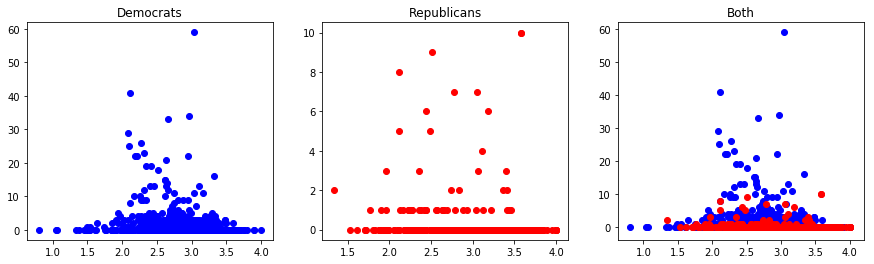

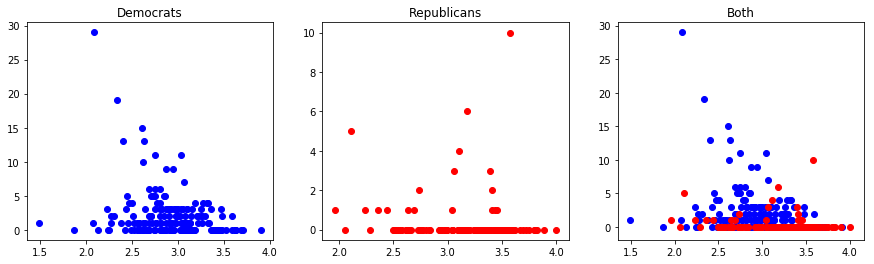

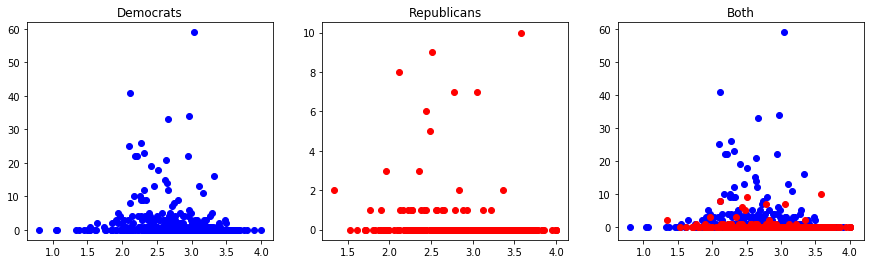

In [107]:
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = dem_df['sentiment'], dem_df['sexual_assault_tweet_count'], rep_df['sentiment'], rep_df['sexual_assault_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = won_primary_dem_df['sentiment'], won_primary_dem_df['sexual_assault_tweet_count'], won_primary_rep_df['sentiment'], won_primary_rep_df['sexual_assault_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = lost_primary_dem_df['sentiment'], lost_primary_dem_df['sexual_assault_tweet_count'], lost_primary_rep_df['sentiment'], lost_primary_rep_df['sexual_assault_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

# Candidate Sentiment vs Number of Gender Tweets

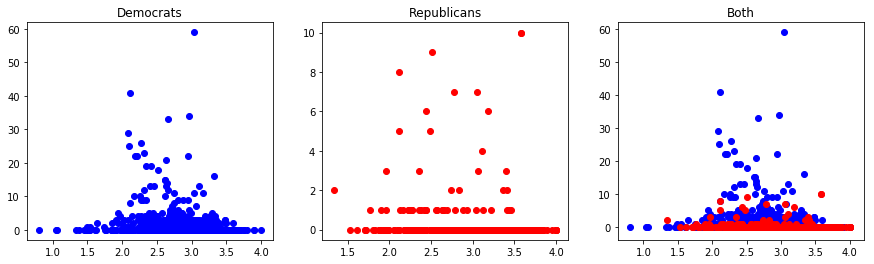

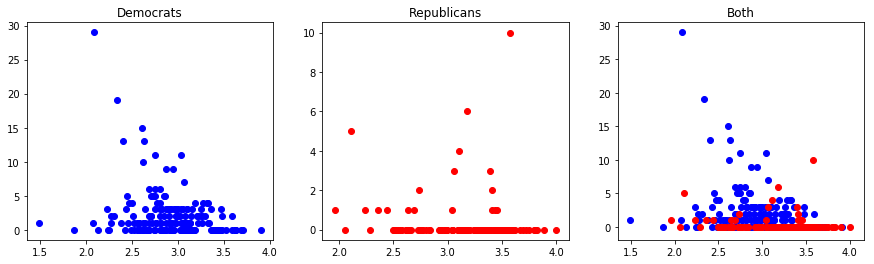

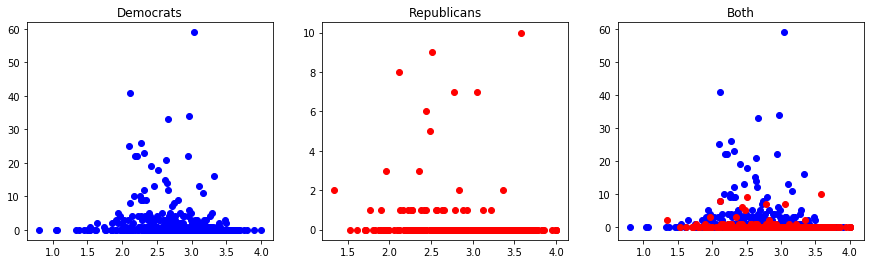

In [108]:
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = dem_df['sentiment'], dem_df['gender_tweet_count'], rep_df['sentiment'], rep_df['gender_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = won_primary_dem_df['sentiment'], won_primary_dem_df['gender_tweet_count'], won_primary_rep_df['sentiment'], won_primary_rep_df['gender_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = lost_primary_dem_df['sentiment'], lost_primary_dem_df['gender_tweet_count'], lost_primary_rep_df['sentiment'], lost_primary_rep_df['gender_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

# Candidate Sentiment vs Number of Women Tweets

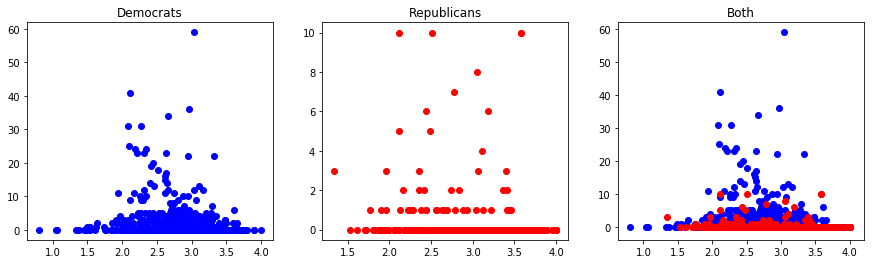

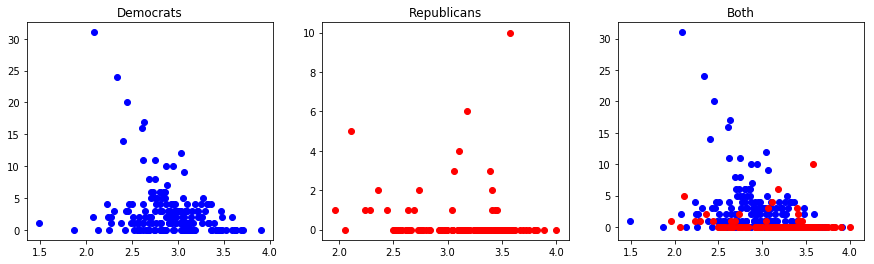

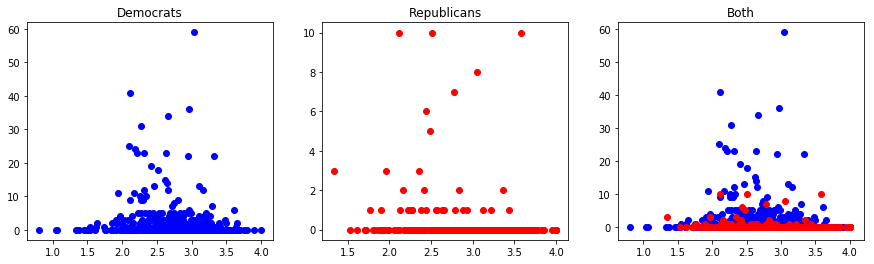

In [109]:
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = dem_df['sentiment'], dem_df['women_tweet_count'], rep_df['sentiment'], rep_df['women_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = won_primary_dem_df['sentiment'], won_primary_dem_df['women_tweet_count'], won_primary_rep_df['sentiment'], won_primary_rep_df['women_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = lost_primary_dem_df['sentiment'], lost_primary_dem_df['women_tweet_count'], lost_primary_rep_df['sentiment'], lost_primary_rep_df['women_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

# Candidate Sentiment vs Number of LGBT Tweets

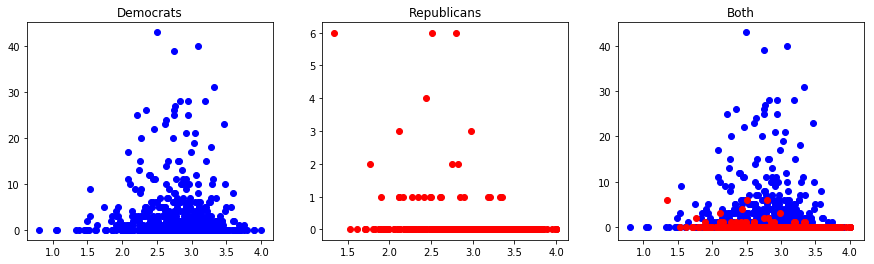

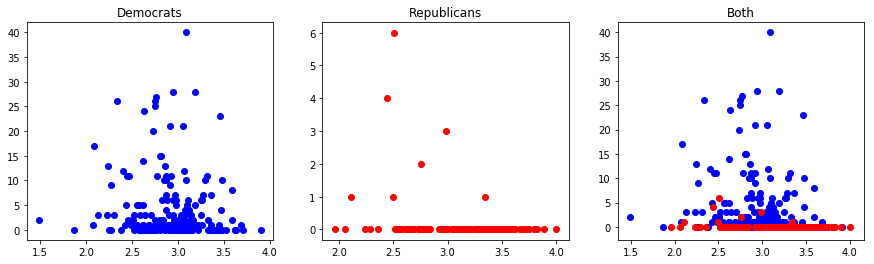

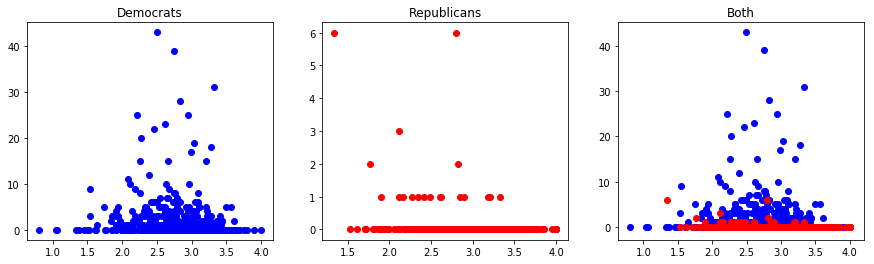

In [110]:
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = dem_df['sentiment'], dem_df['lgbt_tweet_count'], rep_df['sentiment'], rep_df['lgbt_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = won_primary_dem_df['sentiment'], won_primary_dem_df['lgbt_tweet_count'], won_primary_rep_df['sentiment'], won_primary_rep_df['lgbt_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = lost_primary_dem_df['sentiment'], lost_primary_dem_df['lgbt_tweet_count'], lost_primary_rep_df['sentiment'], lost_primary_rep_df['lgbt_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

# Candidate Sentiment vs Number of Freedom Tweets

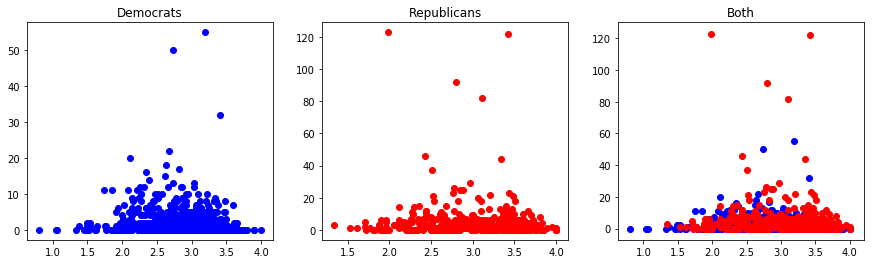

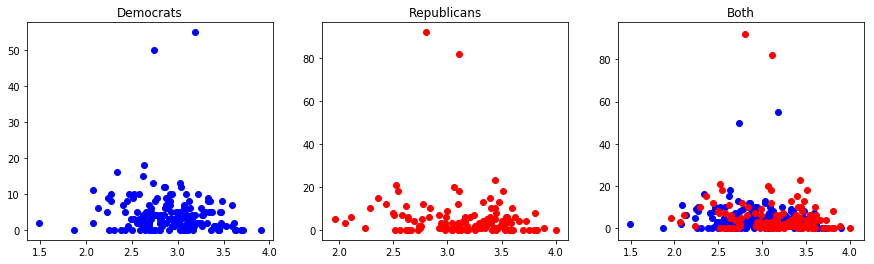

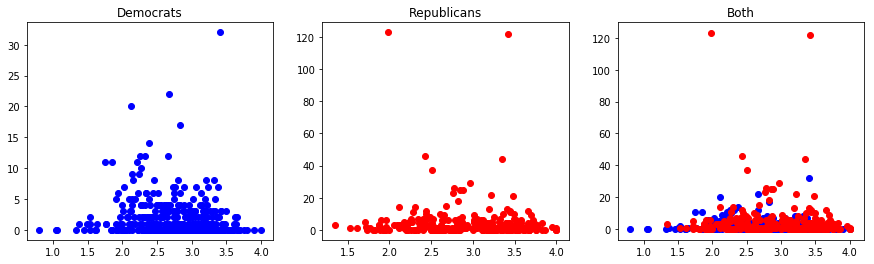

In [111]:
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = dem_df['sentiment'], dem_df['freedom_tweet_count'], rep_df['sentiment'], rep_df['freedom_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = won_primary_dem_df['sentiment'], won_primary_dem_df['freedom_tweet_count'], won_primary_rep_df['sentiment'], won_primary_rep_df['freedom_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = lost_primary_dem_df['sentiment'], lost_primary_dem_df['freedom_tweet_count'], lost_primary_rep_df['sentiment'], lost_primary_rep_df['freedom_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

# Candidate Sentiment vs Number of Trump Tweets

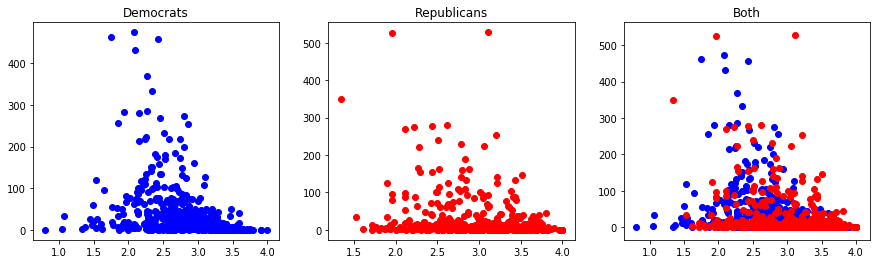

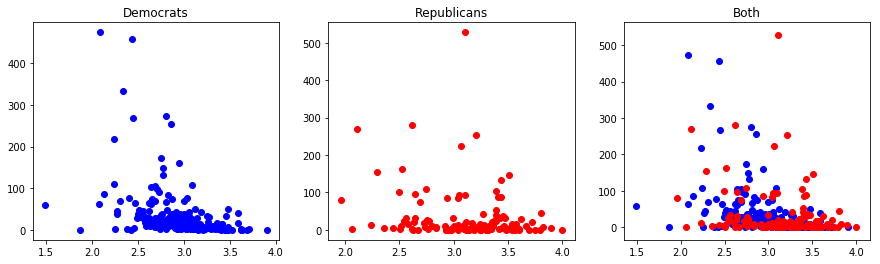

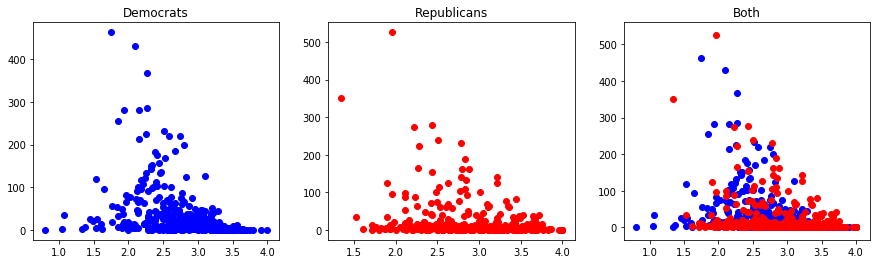

In [112]:
fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = dem_df['sentiment'], dem_df['trump_tweet_count'], rep_df['sentiment'], rep_df['trump_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = won_primary_dem_df['sentiment'], won_primary_dem_df['trump_tweet_count'], won_primary_rep_df['sentiment'], won_primary_rep_df['trump_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')

fig, (axs1, axs2, axs3) = plt.subplots(1, 3, figsize=(15, 4))
d1, d2, r1, r2 = lost_primary_dem_df['sentiment'], lost_primary_dem_df['trump_tweet_count'], lost_primary_rep_df['sentiment'], lost_primary_rep_df['trump_tweet_count']
axs1.set_title("Democrats")
axs1.scatter(d1, d2, c='blue')
axs2.set_title("Republicans")
axs2.scatter(r1, r2, c='red')
axs3.set_title("Both")
axs3.scatter(d1, d2, c='blue')
axs3.scatter(r1, r2, c='red')